Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 05 in Python 
---------------
- ___Please put your names and student IDs here___:
    - Wei-Cheng Lin, 01/1348028
    - Kuon Ito, 01/1358810

---

## Exercise 1: Pruning Decision Trees With Cost-Complexity Pruning
 To get an idea of what values of the cost complexity parameter ``ccp_alpha`` could be appropriate, scikit-learn provides `DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process.

Use the breast cancer dataset form `scikit-learn` (loaded via `load_treast_cancer`) for your training and test sets.

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### (a) Plot effective alpha and the total impurity of leaves. Explain what the plot shows. Make sure to remove the maximum effective alpha (to avoid the inclusion of a trivial decision tree.)

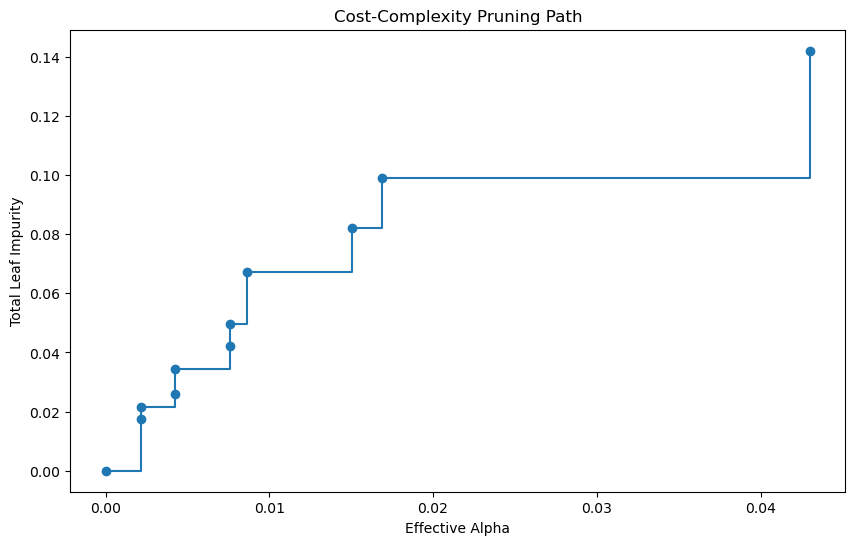

In [3]:
tree = DecisionTreeClassifier(random_state=0)
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Leaf Impurity")
plt.title("Cost-Complexity Pruning Path")
plt.show()

##### (b) Train a decision tree for each effective alpha and save the models (e.g. withina a for loop)

In [4]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32027199074911666


##### (c) Create a plot that shows that the number of nodes and tree depth decreases as alpha increases, based on the decision trees you have trained in (b).

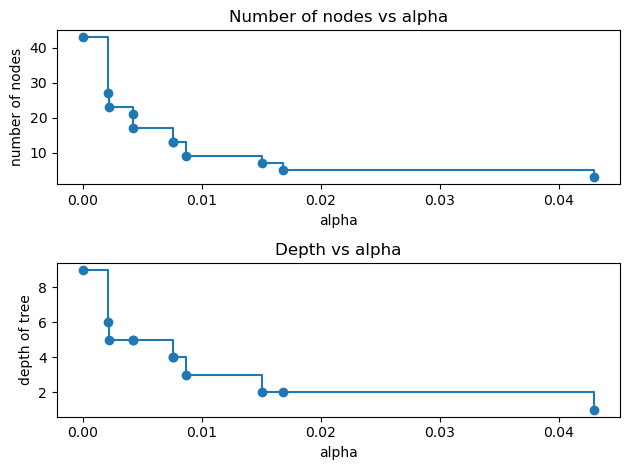

In [5]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


## Exercise 2: Bayesian Networks

You are going to find a Bayesian network structures that best fit some the Titanic passenger survival dataset. The data provides information on the fate of passengers on the "Titanic", with features such as economic status (class), sex, age and survival. The data was discretized in order to let you only deal with discrete variables.

##### __(a) Load the Titanic dataset and use the structure learning in the `pomegranate` package to generate a `BayesianNetwork.from_samples()`.__ 
__Use the `exact` algorithm parameter and **plot** the resulting Bayesian network.__

_(Hint: the input has to be a `X:array-like, shape (n_samples, n_nodes)` and you can resize the plot using the `plt.figure(figsize=(float, float)`)_

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from pomegranate import BayesianNetwork

import networkx as nx

# You may find the pygraphviz package helpful for plotting. 
# If you want to use it, we recommend installing it via '!conda install -c conda-forge pygraphviz'

ImportError: cannot import name 'BayesianNetwork' from 'pomegranate' (/Users/linweicheng/opt/anaconda3/lib/python3.9/site-packages/pomegranate/__init__.py)

In [ ]:
data_path = "data/.csv"
column_names = ["age", "portembarked", "fare", "numparentschildren", "passengerclass", "sex", "numsiblings", "survived"]
df = pd.read_csv(data_path, header=0, names=column_names)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_array = X_train.to_numpy()

model = BayesianNetwork.from_samples(X_train_array, algorithm='exact')

plt.figure(figsize=(12, 8))
graph = nx.DiGraph()
for i, child in enumerate(model.structure):
    for parent in child:
        graph.add_edge(column_names[parent], column_names[i])

pos = nx.spring_layout(graph, seed=42)
nx.draw(graph, pos, with_labels=True, font_weight='bold', arrowsize=20)
plt.title("Bayesian Network for Titanic")
plt.show()

##### __(b) Describe the resulting Bayesian network which you plotted in (a) and explain why Bayesian networks are useful.__ 

```
A Bayesian network is a probabilistic graphical model that represents a set of random variables and their conditional dependencies through a directed acyclic graph (DAG). In this graph, for example, the 'portembarked' may influence the 'passengerclass,' suggesting that where the passenger got on the ship affects the passenger's class. And the direct arrow from "passengerclass" to "fare" and "age" implies that the passenger's class directly influences both the fare paid for ticket and passenger's age.

Bayesian networks are helpful because they provide an intuitive way to model probabilistic relationships between variables, enabling predictions or probability estimates for unobserved variables based on observed evidence.
```

## Exercise 3: Support Vector Machines 
In this exercise we will train a SVM to classify tumors into canerous and non-cancerous. 

In [ ]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns 

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

##### __(a) Transform the data into a dataframe__

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

##### __(b) Display the following attributes `mean compactness`,  `mean concavity`,  `mean concave points`, `mean symmetry` of cancer dataset using the `sns.pairplot()` method.__
__Color canerous and non-cancerous data points in the scatterplot matrix.__

In [ ]:
attributes = ['mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'target']
selected_df = df[attributes]

scatterplot = sns.pairplot(selected_df, hue='target', palette={0: 'green', 1: 'red'}, markers=["o", "s"])
scatterplot.add_legend()
plt.show()

##### __(c) Create a training (75%) and test (25%) dataset using.__
_(Hint: use the `sklearn.model_selection.train_test_split` method and the parameter `random_state=0`)_

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

##### __(d) Train a SVM (support vector machine) using the `sklearn.svm.SVC` and compute the accuracy on the training and test data.__
_(Hint: use the `sklearn.metrics.accuracy_score` for the accuracy)_

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(random_state=0)
svm_classifier.fit(X_train, y_train)

y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Accuracy on the training set:", accuracy_train)
print("Accuracy on the test set:", accuracy_test)

##### __(e) Normalize (min-max-normalization) each column of the DataFrame generated in (a).__
_(Hint: do not use any library other then `pandas` for this)_

In [ ]:
def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column

normalized_df = df.apply(min_max_normalize, axis=0)
normalized_df

##### __(f) Split the normalized data again into a training and test dataset.__ _(Hint: for the splitting use same parameters as in (c))_ 
__Train a SVM with the normalized data and compute again the accuracy for the normalized training and test data.__

In [ ]:
X_normalized = normalized_df.drop('target', axis=1)
y_normalized = normalized_df['target']

X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(
    X_normalized, y_normalized, test_size=0.25, random_state=0
)

svm_classifier_normalized = SVC(random_state=0)
svm_classifier_normalized.fit(X_train_normalized, y_train_normalized)

y_train_pred_normalized = svm_classifier_normalized.predict(X_train_normalized)
y_test_pred_normalized = svm_classifier_normalized.predict(X_test_normalized)

accuracy_train_normalized = accuracy_score(y_train_normalized, y_train_pred_normalized)
accuracy_test_normalized = accuracy_score(y_test_normalized, y_test_pred_normalized)

print("Accuracy on the normalized training set:", accuracy_train_normalized)
print("Accuracy on the normalized test set:", accuracy_test_normalized)

##### __(g) Compare and explain the results of (d) and (f). Explain the differences in accuracy that result from normalization.__

```
Normalization is beneficial when using algorithms that are sensitive to the scale of features, such as SVM. It helps achieving better convergence during the training process and prevents certain features from having a disproportionate impact on the model.

The accuracy on the normalized dataset is significantly higher than the accuracy on the non-normalized dataset. This improvement can be attributed to the fact that normalization scales all features to a similar range, preventing certain features from dominating the learning process due to their larger magnitudes. 
```

***<span style="color:orange">Feedback: </span>***

- Overall looks great!
- Exericse 1 looks good
- Exercise 2 not required, sorry for the package problems..but awesome that you made it work! Looks pretty good, although there maybe was a plotting issue, surived should also be part of bayesian graph (the final variable to be predicted in fact)
- Exercise 3 looks good, although the answer 3g) could have been even moore concrete: distances (used in kernel function) are very dependent on attribute scales-
            

***<span style="color:green">Well done. Grade:green</span>***